In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.DataFrame()
data['A'] = ['a','a','b','a']
data['B'] = ['b','b','a','b']
data['C'] = [0, 0, 1, 0]
data['Class'] = ['n','n','y','y']

In [3]:
data.head()

,A,B,C,Class
0,a,b,0,n
1,a,b,0,n
2,b,a,1,y
3,a,b,0,y


In [4]:
data[['A','B','C']]

,A,B,C
0,a,b,0
1,a,b,0
2,b,a,1
3,a,b,0


In [10]:
one_hot_data = pd.get_dummies(data[['A','B','C']],drop_first=True)

In [11]:
# Decision Tree library
tree = DecisionTreeClassifier(criterion='entropy')

data['Class']

0    n
1    n
2    y
3    y
Name: Class, dtype: object

In [12]:
tree.fit(one_hot_data, data['Class'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

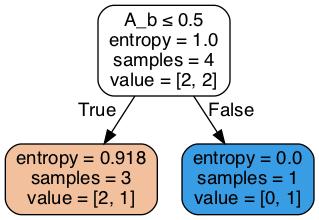

In [16]:
feature_names = ["C", "A_b", "B_b"]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=feature_names,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
# ######################################################
# codigo will wait CATEGORICO
# ######################################################
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [18]:
#names = ["Nearest Neighbors","Decision Tree","SVM","GaussianNB"]
names = ["Decision Tree"]

#classifiers = [KNeighborsClassifier(3),tree.DecisionTreeClassifier(criterion='entropy'),SVC(kernel='linear', C=1E10),GaussianNB()]
classifiers = [tree.DecisionTreeClassifier(criterion='entropy')]

In [19]:
wait = pd.read_csv('WillWait_ShouldWeWait.csv')

In [20]:
wait

,Example,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,WillWait
0,1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,4,Yes,No,Yes,Yes,Full,$,Yes,No,Thai,10-30,Yes
4,5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
5,6,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
6,7,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
7,8,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
8,9,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,10,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


In [21]:
one_hot_data = pd.get_dummies(wait[['Alt','Bar','Fri','Hun','Pat','Price','Rain','Res','Type','Est']],drop_first=True)

In [22]:
one_hot_data

,Alt_Yes,Bar_Yes,Fri_Yes,Hun_Yes,Pat_None,Pat_Some,Price_$$,Price_$$$,Rain_Yes,Res_Yes,Type_French,Type_Italian,Type_Thai,Est_10-30,Est_30-60,Est_>60
0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0
4,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1
5,0,1,0,1,0,1,1,0,1,1,0,1,0,0,0,0
6,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0
8,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
9,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0


In [23]:
X=one_hot_data
y=wait[wait.columns[11:12]]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [25]:
for name, clf in zip(names, classifiers):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    score = clf.score(X_test, y_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print("%s:   \t %8.4f"%(name, score))
    print(cnf_matrix)

Decision Tree:   	   0.7500
[[2 1]
 [0 1]]
